In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import pandas
from sklearn.preprocessing import StandardScaler

In [4]:
speed = [99, 96, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
generatedArray = np.random.uniform(0.0, 5.0, 250) #250 value array of values between 0 and 5

print(np.percentile(ages, 75)) #prints 43 because 75% of the people/values are 43 or younger/lower
print(generatedArray)
print("generatedArray Median =", np.median(generatedArray))
print("generatedArray Mode=", stats.mode(generatedArray))
print(np.percentile(generatedArray, 60))

43.0
[5.39123767e-01 4.73864847e+00 6.40915544e-01 3.42981662e+00
 5.42504042e-01 3.31367458e+00 3.23147868e+00 3.23819662e+00
 3.35594303e-03 2.90604796e+00 4.22624636e+00 3.63918134e-01
 9.88265425e-01 3.19209972e+00 6.77579138e-01 2.03247092e+00
 4.47023878e-01 3.13913971e+00 3.24119548e+00 2.29121423e-01
 3.48160296e+00 4.05121263e-01 1.59865839e+00 4.05892078e+00
 3.19496042e+00 8.76131059e-01 1.40678809e+00 4.96394378e+00
 2.06904973e-01 3.58418913e-01 2.38508597e+00 3.63474883e+00
 1.75107388e+00 2.30707887e-01 3.12120136e+00 5.91211545e-01
 3.62790929e+00 3.51278485e+00 4.85238672e+00 4.52168670e+00
 4.04917647e-01 4.22010690e+00 4.41823624e-01 3.09810047e+00
 2.25676776e+00 5.37817608e-01 7.89384088e-01 2.77762084e+00
 2.06205591e+00 3.69052316e+00 1.89887915e+00 3.99645298e+00
 3.06622238e+00 4.15236699e+00 1.85058965e+00 3.69780525e+00
 1.18144548e+00 1.73303392e+00 4.46108573e+00 3.94152994e+00
 4.72583073e+00 2.90337522e+00 4.61411568e+00 4.40989302e+00
 3.18631344e+00 4.1

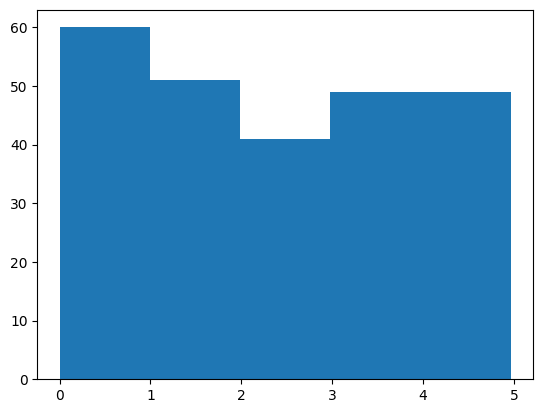

In [5]:
plt.hist(generatedArray, 5)
plt.show()

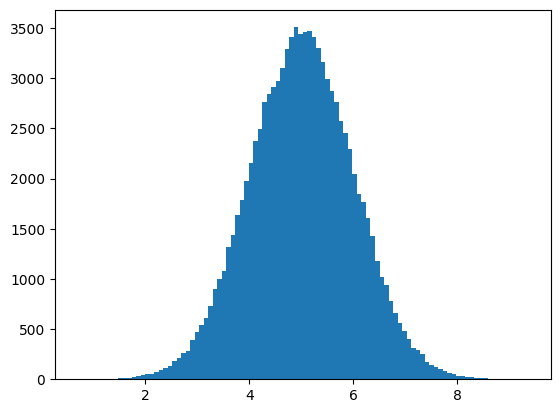

In [6]:
arr2 = np.random.normal(5.0, 1.0, 100000) #random array of 1000000 values centered around 5 with standard deviation 1
plt.hist(arr2, 100)
plt.show()

# Linear Regression

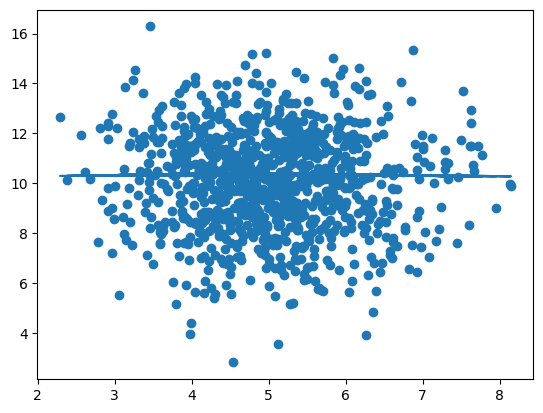

r = -0.028673804883987918


In [7]:
arr3 = np.random.normal(5.0, 1.0, 1000)
arr4 = np.random.normal(10.0, 2.0, 1000)


slope, intercept, r, p, std_err = stats.linregress(arr3, arr4) #the values of this line are fed by stats.linregress(arr3, arr4) and each have a separate value

def someFunc(arr3):
    return np.sin(arr3) * slope + intercept

simpleModel = list(map(someFunc, arr3))

plt.scatter(arr3, arr4)
plt.plot(arr3, simpleModel)
plt.show()

print("r =", r)

An obscenely low r or rsquared means dataset may not be a fit for the regression you're trying

In [8]:
# Using function to predict values

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


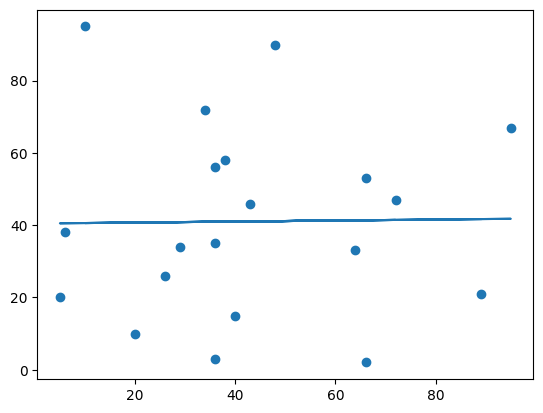

0.013318141542974908


In [9]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

# Polynomial Regression

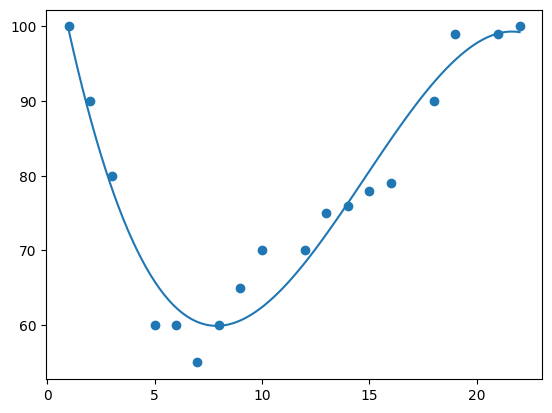

0.9432150416451025
88.87331269697988


In [10]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

polyModel = np.poly1d(np.polyfit(x, y, 3)) #method for creating polynomial model

polyLine = np.linspace(1, 22, 100) #specifies how the line will display, (start, end, something)

plt.scatter(x, y) #draw scatter plot
plt.plot(polyLine, polyModel(polyLine)) #plot line of polynomial regression onto drawn plot
plt.show()
print(r2_score(y, polyModel(x))) #like normal r but btwn 0 and 1 (1 being 100% related)
print(polyModel(17)) #predicted based on polynomial regression on original scatter plot

# Multiple Regression
Like linear regression, but more than one independent value, meaning two or more variables can be predicted

In [11]:
# we'll be using the data.csv I got from w3schools for this

dataFile = df = pandas.read_csv("data.csv")
X = df[['Weight', 'Volume']] #need two brackets because 2D array; this will be our independent variable
y = df['CO2'] #dependent variable

regr = linear_model.LinearRegression() #method to create linear regression object
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]]) #predicts C02 emission of a car where the weight is 2300 and the volume is 1300
print(predictedCO2)

print(regr.coef_) #coef_ is the relationship with an unknown variable, should print [coefficient value of weight against CO2, coef value of volume against CO2]

[114.75968007]
[0.00755095 0.00780526]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scale
If things are in different units or proportions, and they create errors inside your model, you can scale everything to fit better

Standardization method: 
z = (x - u) / s    ;    z is the new value, x is the original value, u is the mean, and s is the standard deviation

In [12]:
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [13]:
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Train/Test
The big boy stuff, finally

https://www.w3schools.com/python/python_ml_train_test.asp

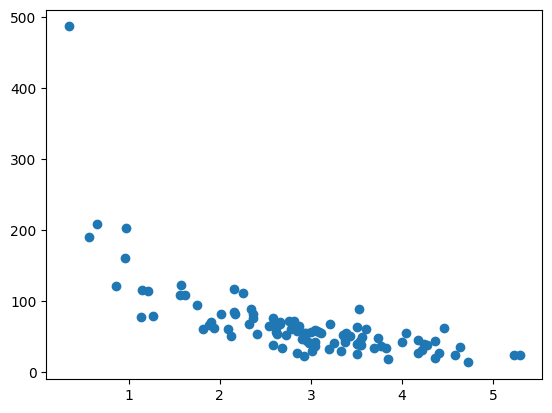

In [19]:
e = 2.71828

np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()



In [21]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

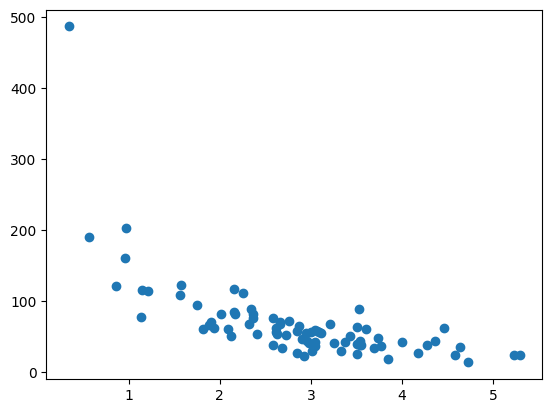

In [22]:
# Training Set
plt.scatter(train_x, train_y)
plt.show()

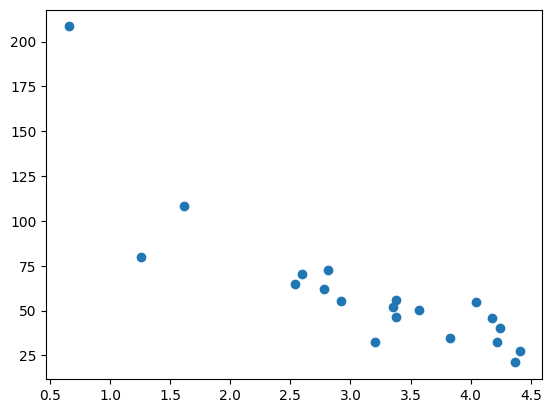

In [23]:
# Testing Set
plt.scatter(test_x, test_y)
plt.show()

r2 = 0.7988645544629798


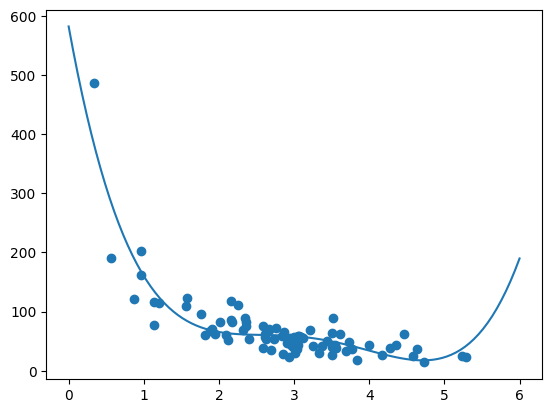

In [26]:
# Finding fit with polynomial regression

trainModel = np.poly1d(np.polyfit(train_x, train_y, 4)) # deg means degree of polynomial
trainLine = np.linspace(0, 6, 100)
r2 = r2_score(train_y, trainModel(train_x))

print("r2 =", r2)
plt.scatter(train_x, train_y)
plt.plot(trainLine, trainModel(trainLine))
plt.show()

In [36]:
# Model created, now test with test set

r2 = r2_score(test_y, trainModel(test_x))
print("Confidence\\Accuracy =", r2)

# Predicting values
print("Predicted value at 5:", trainModel(5))

Confidence\Accuracy = 0.8086921460343579
Predicted value at 5: 22.879625918117654


# Decision Trees
Helps make decisions based on previous experience